## Feature Engineering
A feature is an attribute of a dataset that is useful to the problem you are solving. If a feature has no impact on the problem you are solving, it is not part of the problem.

`Feature engineering is defined as the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.`

The better the features you create and choose for your predictive models’, the better your results will be. Feature engineering is an art where you decompose or aggregate, raw data to help solve your problem; however, there are many approaches to this process.

- Feature Extraction: select and/or combine variables into features to reduce the dimensionality of your dataset. (e.g. Principle Component Analysis, Nonlinear dimensionality reduction, unsupervised clustering methods)

- Feature Selection: select the features which contribute most to the problem you are solving. (e.g. Variance thresholding, Pearson correlation, LASSO)

- Feature Construction: the process of manually building more efficient features from raw data. (e.g. Dynamic aggregation of relational attributes)

- Feature Learning: the automatic identification and use of features. (e.g. Restricted Boltzmann machine, K-means clustering)

Using feature importance scoring methods, you can estimate how useful the feature will be. Features are given scores so they can be ranked based on these scores.

Methods include:
- the correlation coefficient between the feature and the target variable (the feature that you are trying to predict)
- predictive models have embedded feature selection methods(e.g. Random Forest, Gradient Boosting Machine)
- Chi-Squared test (between target and numerical variable)
- Recursive Feature Elimination

Feature engineering is an iterative process. It can look something like:

- Brainstorm feature ideas.
- create features based on the problem (e.g. feature extraction/construction)
- choose features based on feature importance scores
- Calculate model accuracy using the chosen features on unseen data.
- Repeat steps until a suitable model is chosen.

## Implementation

For our problem, we will be first checking the feature importance of each features.

### Method 1: correlation coefficient between the feature and the target variable

In [1]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [2]:
data = pd.read_csv("./data/cleaned_data.csv")
data.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,0
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,1
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,0
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,0
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,0


In [3]:
# Calculate correlation of each feature with the target variable
correlation_matrix = data.corr()  # Pearson correlation by default
target_corr = correlation_matrix["is_hazardous"]


In [4]:
# Show the correlations with the target variable
print(target_corr)

absolute_magnitude       -0.343996
estimated_diameter_min    0.164841
estimated_diameter_max    0.164841
relative_velocity         0.187034
miss_distance            -0.006542
is_hazardous              1.000000
Name: is_hazardous, dtype: float64


We may choose to drop the miss_distance feature since its correlation with the target is weak.

### Method 2: Variance Thresholding

In [5]:
# Separate features (X) and target (y)
X = data.drop(columns=['is_hazardous'])
y = data['is_hazardous']

In [6]:
# Initialize VarianceThreshold with a threshold of 0.1 (for example)
selector = VarianceThreshold(threshold=0.1)

# Fit and transform the data to remove low variance features
X_selected = selector.fit_transform(X)

# Get the selected features
selected_feature_names = X.columns[selector.get_support()]

# Show the selected features
print("Selected Features based on Variance Thresholding:", selected_feature_names)


Selected Features based on Variance Thresholding: Index(['absolute_magnitude', 'estimated_diameter_max', 'relative_velocity',
       'miss_distance'],
      dtype='object')


### Method 3: Recursive Feature Elimination

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize the model (Random Forest Classifier)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE with the model and the number of features to select
rfe = RFE(estimator=rf)
rfe.fit(X_train, y_train)


RFE(estimator=RandomForestClassifier(random_state=42))

In [10]:
# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['estimated_diameter_max', 'miss_distance'], dtype='object')


### Method 4: Random Forest Feature Importance

In [11]:
# Fits the model on the data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

                  Feature  Importance
4           miss_distance    0.296888
3       relative_velocity    0.285748
0      absolute_magnitude    0.143051
2  estimated_diameter_max    0.137763
1  estimated_diameter_min    0.136550


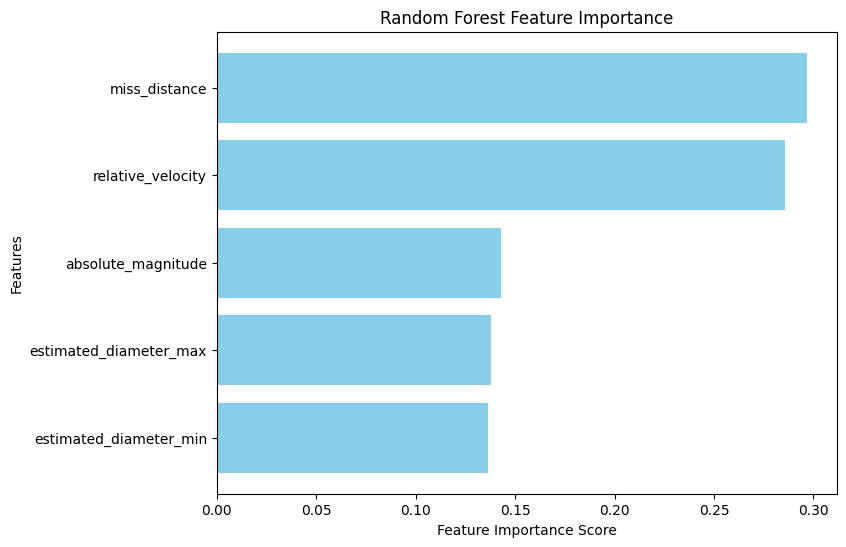

In [13]:
import matplotlib.pyplot as plt

# Extract feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Print feature importance
print(importance_df)

# Visualize feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()